# Lung Cancer Detection Model

For modeling, we will using a Convolutional Neural Network (CNN) model approach. We first start by importing the training, testing, and validation *.npy* datasets, which contain the preprocessed image data.

In [1]:
import numpy as np

# Load the datasets
X_train = np.load('./preprocessed/X_train.npy')
y_train = np.load('./preprocessed/y_train.npy')

X_val = np.load('./preprocessed/X_val.npy')
y_val = np.load('./preprocessed/y_val.npy')

X_test = np.load('./preprocessed/X_test.npy')
y_test = np.load('./preprocessed/y_test.npy')

# Check the shapes of the datasets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (1222, 128, 128, 1), Training labels shape: (1222,)
Validation data shape: (262, 128, 128, 1), Validation labels shape: (262,)
Testing data shape: (262, 128, 128, 1), Testing labels shape: (262,)


## Define the CNN Model

Next step is to create a CNN architecture using TensorFlow and Keras

1. **Define the CNN Model**:
   - The model consists of:
     - Two convolutional layers (`Conv2D`) with ReLU activation, followed by max-pooling layers (`MaxPooling2D`).
     - A `Flatten` layer to convert the 2D feature maps into a 1D vector.
     - A dense hidden layer with 128 neurons and ReLU activation.
     - A `Dropout` layer with a rate of 0.5 to reduce overfitting.
     - An output layer with 2 neurons (for binary classification) and a softmax activation function.

2. **Compile the Model**:
   - Optimizer: `adam` is used for efficient gradient-based optimization.
   - Loss Function: `categorical_crossentropy` is used for multi-class classification.
   - Metrics: `accuracy` and `Recall()` are used to evaluate the model's performance.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.backend import clear_session
from tensorflow.keras.metrics import Recall

clear_session()

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Recall()])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [3]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2) 
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Verify the shapes
print(f"Training labels shape after one-hot encoding: {y_train.shape}")
print(f"Validation labels shape after one-hot encoding: {y_val.shape}")
print(f"Testing labels shape after one-hot encoding: {y_test.shape}")

Training labels shape after one-hot encoding: (1222, 2)
Validation labels shape after one-hot encoding: (262, 2)
Testing labels shape after one-hot encoding: (262, 2)


## Train the Model

Next step is training the model using the training and validation datasets

In [4]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,  
    batch_size=32
)

Epoch 1/20
39/39 [==============================] - 6s 133ms/step - loss: 0.6399 - accuracy: 0.6718 - recall: 0.6718 - val_loss: 0.5213 - val_accuracy: 0.7137 - val_recall: 0.7137
Epoch 2/20
39/39 [==============================] - 5s 121ms/step - loss: 0.3556 - accuracy: 0.8535 - recall: 0.8535 - val_loss: 0.2791 - val_accuracy: 0.8473 - val_recall: 0.8473
Epoch 3/20
39/39 [==============================] - 5s 124ms/step - loss: 0.2185 - accuracy: 0.9223 - recall: 0.9223 - val_loss: 0.1628 - val_accuracy: 0.9466 - val_recall: 0.9466
Epoch 4/20
39/39 [==============================] - 5s 123ms/step - loss: 0.1638 - accuracy: 0.9386 - recall: 0.9386 - val_loss: 0.1351 - val_accuracy: 0.9580 - val_recall: 0.9580
Epoch 5/20
39/39 [==============================] - 5s 123ms/step - loss: 0.1238 - accuracy: 0.9542 - recall: 0.9542 - val_loss: 0.1413 - val_accuracy: 0.9389 - val_recall: 0.9389
Epoch 6/20
39/39 [==============================] - 5s 123ms/step - loss: 0.1055 - accuracy: 0.9656 

## Evaluate and Visualize Model Results

Evaluate the model on the testing dataset and visualize the training and validaion accuracy, loss, and recall over epochs using *Matplotlib* and various data visualization methods

9/9 [==============================] - 0s 25ms/step - loss: 0.1962 - accuracy: 0.9389 - recall: 0.9389
Test Loss: 0.19620981812477112
Test Accuracy: 0.9389312863349915
Test Recall: 0.9389312863349915


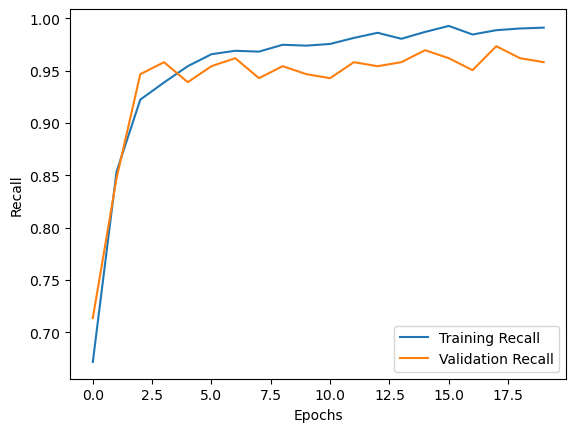

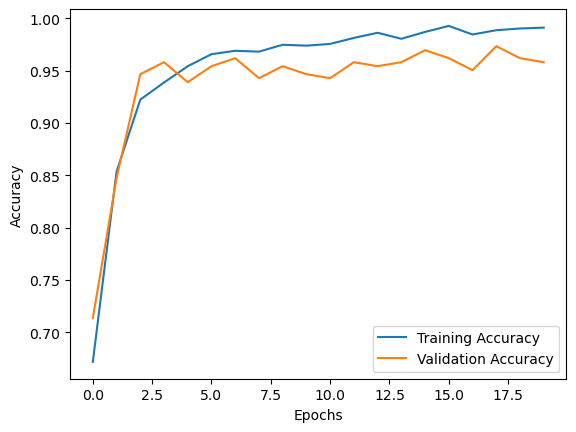

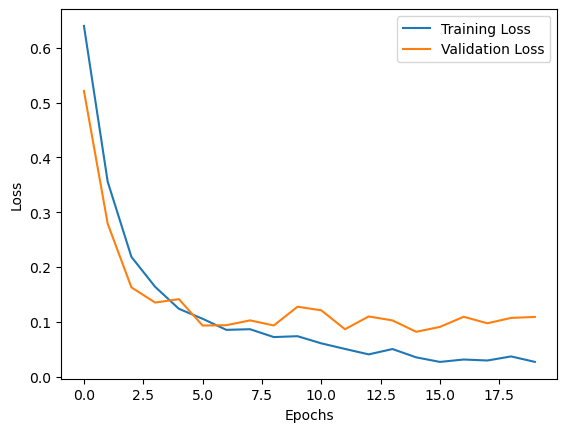

In [5]:
# Evaluate the model
test_loss, test_accuracy, test_recall = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Recall: {test_recall}")

import matplotlib.pyplot as plt

# Plot recall
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

9/9 [==============================] - 0s 27ms/step
Recall: 0.9402985074626866


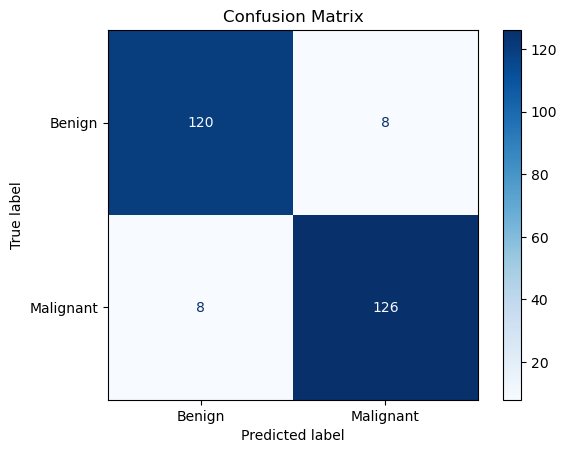

In [6]:
from sklearn.metrics import recall_score, classification_report
import numpy as np

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoding to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Calculate recall
recall = recall_score(y_true_classes, y_pred_classes, average='binary')  # Use 'binary' for binary classification
print(f"Recall: {recall}")

# Generate a full classification report
# report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1'])
# print(report)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

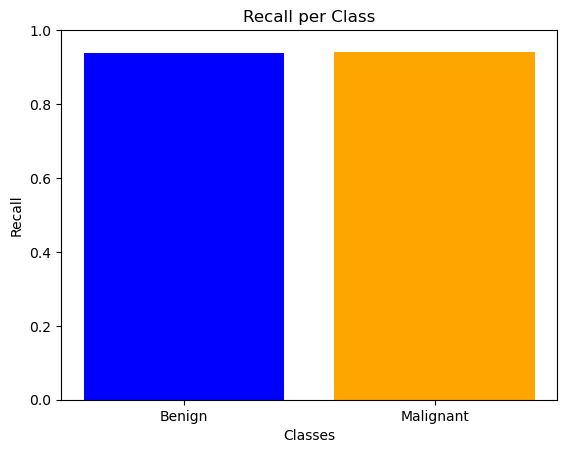

In [7]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# Calculate recall for each class
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)

# Plot the recall values
classes = ['Benign', 'Malignant']
plt.bar(classes, recall_per_class, color=['blue', 'orange'])
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall per Class')
plt.ylim(0, 1) 
plt.show()

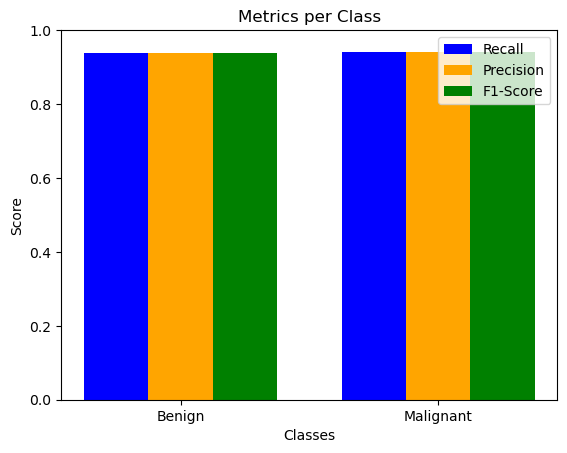

In [8]:
from sklearn.metrics import precision_score, f1_score

# Calculate precision and F1-score for each class
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)
f1_per_class = f1_score(y_true_classes, y_pred_classes, average=None)

# Plot metrics
classes = ['Benign', 'Malignant']
x = range(len(classes))
plt.bar(x, recall_per_class, width=0.25, label='Recall', color='blue', align='center')
plt.bar([p + 0.25 for p in x], precision_per_class, width=0.25, label='Precision', color='orange', align='center')
plt.bar([p + 0.5 for p in x], f1_per_class, width=0.25, label='F1-Score', color='green', align='center')

plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Metrics per Class')
plt.xticks([p + 0.25 for p in x], classes)
plt.ylim(0, 1)
plt.legend()
plt.show()